In [1]:
import dataInterpreter as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sklearn.metrics
import scipy.stats
import matplotlib.mlab as mlab
import random

random.seed(42)

dt.get_data_by_series(1)
#dt.get_data('NHBE', 'healthy', 'sars-cov2')

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
WASH7P,3.401197,3.218876,3.178054,3.555348,2.995732,3.806662
LOC729737,4.727388,4.787492,4.736198,4.852030,4.442651,5.602119
LOC100133331,2.995732,3.091042,3.610918,2.833213,3.178054,4.007333
LOC100288069,2.639057,2.890372,3.332205,2.995732,2.302585,3.931826
LINC00115,2.302585,2.564949,3.295837,2.564949,2.079442,3.367296
...,...,...,...,...,...,...
TMLHE,4.941642,4.828314,5.209486,4.406719,4.753590,5.888878
SPRY3,2.944439,2.302585,3.555348,3.044522,3.295837,3.828641
VAMP7,5.370638,5.342334,6.093570,5.192957,5.252273,6.249975
DDX3Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147


# Preprocessing

In [5]:
# Remove all null entries
data = dt.get_data_by_series(1)

data = data.loc[(data!=0).any(axis=1)]
data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3
WASH7P,3.401197,3.218876,3.178054,3.555348,2.995732,3.806662
LOC729737,4.727388,4.787492,4.736198,4.852030,4.442651,5.602119
LOC100133331,2.995732,3.091042,3.610918,2.833213,3.178054,4.007333
LOC100288069,2.639057,2.890372,3.332205,2.995732,2.302585,3.931826
LINC00115,2.302585,2.564949,3.295837,2.564949,2.079442,3.367296
...,...,...,...,...,...,...
TMLHE,4.941642,4.828314,5.209486,4.406719,4.753590,5.888878
SPRY3,2.944439,2.302585,3.555348,3.044522,3.295837,3.828641
VAMP7,5.370638,5.342334,6.093570,5.192957,5.252273,6.249975
DDX3Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147


### t-test

In [6]:
ttest_data = data.copy()

pvalues = []

# Obtain p-values using Welch's t-test

for index, row in ttest_data.iterrows():
    pvalues += [scipy.stats.ttest_ind(row[dt.get_columns_by_series(1, 'NHBE', 'healthy')], row[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')], equal_var = True).pvalue]

ttest_data.insert(len(ttest_data.columns), "p-value", pvalues)

ttest_data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,p-value
WASH7P,3.401197,3.218876,3.178054,3.555348,2.995732,3.806662,0.495892
LOC729737,4.727388,4.787492,4.736198,4.852030,4.442651,5.602119,0.561090
LOC100133331,2.995732,3.091042,3.610918,2.833213,3.178054,4.007333,0.801121
LOC100288069,2.639057,2.890372,3.332205,2.995732,2.302585,3.931826,0.822764
LINC00115,2.302585,2.564949,3.295837,2.564949,2.079442,3.367296,0.920994
...,...,...,...,...,...,...,...
TMLHE,4.941642,4.828314,5.209486,4.406719,4.753590,5.888878,0.962249
SPRY3,2.944439,2.302585,3.555348,3.044522,3.295837,3.828641,0.348394
VAMP7,5.370638,5.342334,6.093570,5.192957,5.252273,6.249975,0.934133
DDX3Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.373901


In [7]:
ttest_filtered = ttest_data.loc[(ttest_data['p-value'] < 0.05)]
print(ttest_filtered.shape[0], 'genes selected')

191 genes selected


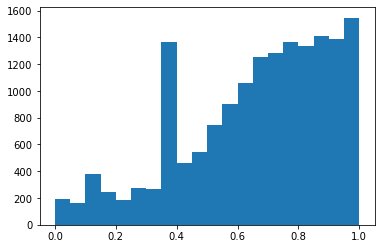

In [8]:
num_bins = 20
n, bins, patches = plt.hist(ttest_data['p-value'], num_bins)
plt.show()

### Non-Parametric Test

In [9]:
mannwhitneyu_data = data.copy()

pvalues = []

# Obtain p-values using Mann-Whitney U test

for index, row in mannwhitneyu_data.iterrows():
    pvalues += [scipy.stats.mannwhitneyu(row[dt.get_columns_by_series(1, 'NHBE', 'healthy')], row[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')]).pvalue]

mannwhitneyu_data.insert(len(mannwhitneyu_data.columns), "p-value", pvalues)

mannwhitneyu_data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,p-value
WASH7P,3.401197,3.218876,3.178054,3.555348,2.995732,3.806662,0.331260
LOC729737,4.727388,4.787492,4.736198,4.852030,4.442651,5.602119,0.331260
LOC100133331,2.995732,3.091042,3.610918,2.833213,3.178054,4.007333,0.500000
LOC100288069,2.639057,2.890372,3.332205,2.995732,2.302585,3.931826,0.500000
LINC00115,2.302585,2.564949,3.295837,2.564949,2.079442,3.367296,0.412389
...,...,...,...,...,...,...,...
TMLHE,4.941642,4.828314,5.209486,4.406719,4.753590,5.888878,0.331260
SPRY3,2.944439,2.302585,3.555348,3.044522,3.295837,3.828641,0.191367
VAMP7,5.370638,5.342334,6.093570,5.192957,5.252273,6.249975,0.331260
DDX3Y,0.000000,0.000000,0.000000,0.000000,0.000000,0.693147,0.252493


In [10]:
mannwhitneyu_filtered = mannwhitneyu_data.loc[(mannwhitneyu_data['p-value'] < 0.05)]
print(mannwhitneyu_filtered.shape[0], 'genes selected')

326 genes selected


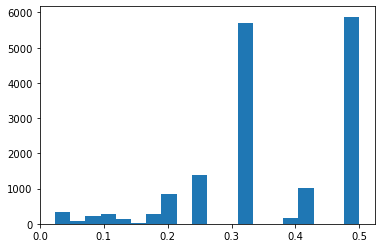

In [11]:
num_bins = 20
n, bins, patches = plt.hist(mannwhitneyu_data['p-value'], num_bins)
plt.show()

# Clustering

## Using t-test data

### K-Means

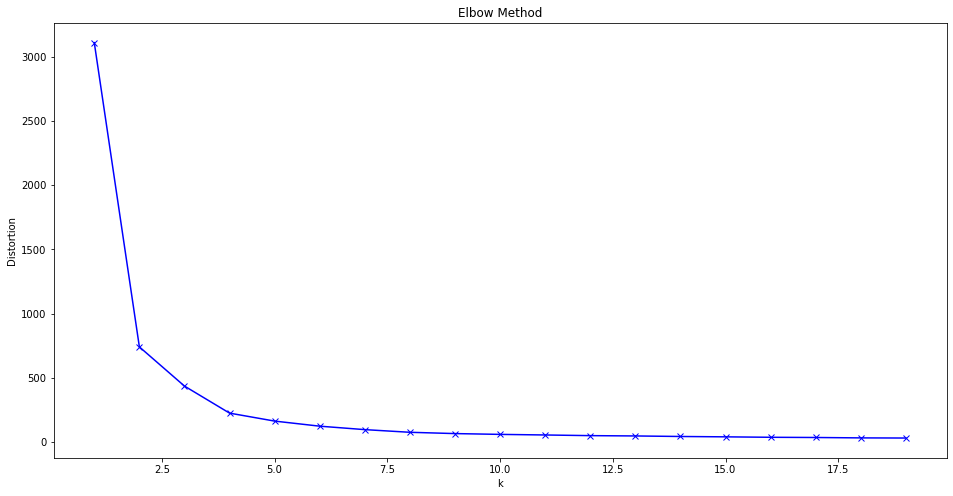

In [7]:
inertia = []

K = range(1, 20)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(ttest_filtered[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')])
    inertia.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [34]:
n_clusters = 4
kmeanModel = KMeans(n_clusters = n_clusters, random_state = 42)
ttest_kmeans_labels = kmeanModel.fit_predict(ttest_filtered[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')])
ttest_kmeans_labels

array([2, 0, 0, 1, 1, 0, 0, 3, 0, 1, 2, 1, 1, 3, 3, 1, 2, 2, 1, 3, 2, 2,
       2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 0, 0, 3, 1,
       2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 3, 3, 2, 3, 2, 0, 0, 2, 2,
       2, 2, 0, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 2, 0, 0, 2, 1, 0,
       0, 0, 0, 2, 2, 2, 1, 0, 1, 3, 3, 0, 2, 0, 1, 0, 0, 2, 0, 3, 2, 0,
       0, 0, 0, 3, 0, 2, 0, 1, 3, 0, 2, 0, 2, 1, 3, 0, 0, 3, 2, 1, 0, 0,
       1, 0, 0, 2, 0, 3, 1, 1, 3, 2, 2, 0, 1, 2, 2, 1, 1, 1, 3, 1, 0, 2,
       0, 0, 1, 2, 2, 3, 0, 3, 2, 1, 0, 2, 3, 2, 2, 2, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0])

In [35]:
np.mean(sklearn.metrics.silhouette_samples(ttest_filtered[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')], ttest_kmeans_labels, metric='euclidean'))

0.5276203324906559

In [3]:
ttest_filtered['k-means_cluster'] = ttest_kmeans_labels

for k in range(n_clusters):
    print(ttest_filtered.loc[ttest_filtered['k-means_cluster'] == k].index)
    

NameError: name 'ttest_kmeans_labels' is not defined

### Agglomerative Clustering

In [11]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 3

cluster = AgglomerativeClustering(n_clusters = n_clusters, affinity = 'euclidean', linkage = 'ward')
ttest_agglomerative_labels = cluster.fit_predict(ttest_filtered[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')])

In [12]:
np.mean(sklearn.metrics.silhouette_samples(ttest_filtered[dt.get_columns_by_series(1, 'NHBE', 'sars-cov2')], ttest_agglomerative_labels, metric='euclidean'))

0.6068638696781256

In [13]:
ttest_filtered.insert(len(ttest_filtered.columns), 'agglom_cluster', ttest_agglomerative_labels)

for k in range(n_clusters):
    print(ttest_filtered.loc[ttest_filtered['agglom_cluster'] == k].index)

Index(['SMIM1', 'CA6', 'C1orf127', 'FAM167B', 'CSMD2', 'CLDN19', 'C8B',
       'SPRR2F', 'SPRR2C', 'S100A7A',
       ...
       'CCIN', 'TAL2', 'RNF183', 'GRIN1', 'MIR23C', 'MAOB', 'PFKFB1', 'MIR503',
       'PNMA3', 'PDZD4'],
      dtype='object', length=137)
Index(['ZC3H12A', 'SPRR2D', 'SPRR2A', 'S100A8', 'SAA2', 'SAA1', 'BIRC3',
       'IFI27', 'SERPINA3', 'TNFAIP2', 'C3', 'ICAM1', 'IL36G', 'CCL20', 'MMP9',
       'MX1', 'LIF', 'CXCL1', 'CXCL2', 'CFB', 'TNFAIP3', 'SOD2', 'INHBA'],
      dtype='object')
Index(['WNT4', 'IFI6', 'PDZK1IP1', 'IFI44L', 'GBP5', 'SPRR2E', 'PGLYRP4',
       'NID1', 'IRF7', 'MRGPRX3', 'MMP13', 'OAS1', 'BCL2A1', 'XAF1', 'CSF3',
       'C1QTNF1', 'TNFSF14', 'RELB', 'PI3', 'MX2', 'IRAK2', 'MYLK', 'CXCL5',
       'CXCL3', 'CSF2', 'N4BP3', 'TNF', 'LTB', 'PSMB9', 'VNN1', 'IL6'],
      dtype='object')
Index([], dtype='object')


### Clustering on columns

In [15]:
distortions = []

K = range(1, 5)

for k in K:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(dt.get[dt.get_columns_by_series(9, 'NHBE', 'healthy', 'iav', 'iavdns1') + dt.get_columns_by_series(1, 'NHBE', 'healthy')])
    distortions.append(kmeanModel.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

KeyError: "['Series9_NHBE_IAV_1', 'Series9_NHBE_IAV_2', 'Series9_NHBE_IAVdNS1_4', 'Series9_NHBE_IAV_3', 'Series9_NHBE_Mock_2', 'Series9_NHBE_Mock_1', 'Series9_NHBE_IAV_4', 'Series9_NHBE_IAVdNS1_2', 'Series9_NHBE_Mock_3', 'Series9_NHBE_Mock_4', 'Series9_NHBE_IAVdNS1_1', 'Series9_NHBE_IAVdNS1_3'] not in index"